In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [129]:
train = pd.read_csv('C:/Users/LENOVO/Downloads/Train_hMYJ020/train.csv')
test = pd.read_csv('C:/Users/LENOVO/Downloads/Test_ND2Q3bm/test.csv')

In [3]:
data_dict = pd.read_csv('C:/Users/LENOVO/Downloads/Train_hMYJ020/train_data_dict.csv')

In [5]:
data_dict

Column  \
0                             case_id   
1                       Hospital_code   
2                  Hospital_type_code   
3                  City_Code_Hospital   
4                Hospital_region_code   
5   Available Extra Rooms in Hospital   
6                          Department   
7                           Ward_Type   
8                  Ward_Facility_Code   
9                           Bed Grade   
10                          patientid   
11                  City_Code_Patient   
12                  Type of Admission   
13                Severity of Illness   
14              Visitors with Patient   
15                                Age   
16                  Admission_Deposit   
17                               Stay   

                                          Description  
0                      Case_ID registered in Hospital  
1                        Unique code for the Hospital  
2                Unique code for the type of Hospital  
3                           City Code of the Hospital  
4                         Region Code of the Hospital  
5     Number of Extra rooms available in the Hospital  
6                     Department overlooking the case  
7                              Code for the Ward type  
8                          Code for the Ward Facility  
9                        Condition of Bed in the Ward  
10                                  Unique Patient Id  
11                          City Code for the patient  
12          Admission Type registered by the Hospital  
13  Severity of the illness recorded at the time o...  
14                Number of Visitors with the patient  
15                                 Age of the patient  
16                      Deposit at the Admission Time  
17                           Stay Days by the patient

In [7]:
train.shape

(318438, 18)

In [8]:
test.shape

(137057, 17)

In [11]:
for cols in train.columns:
    print(cols, ': ', len(train[cols].unique()))

case_id :  318438
Hospital_code :  32
Hospital_type_code :  7
City_Code_Hospital :  11
Hospital_region_code :  3
Available Extra Rooms in Hospital :  18
Department :  5
Ward_Type :  6
Ward_Facility_Code :  6
Bed Grade :  5
patientid :  92017
City_Code_Patient :  38
Type of Admission :  3
Severity of Illness :  3
Visitors with Patient :  28
Age :  10
Admission_Deposit :  7300
Stay :  11


In [14]:
train['Bed Grade'].value_counts()

2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: Bed Grade, dtype: int64

In [18]:
train[train.isnull().any(axis=1)]

case_id  Hospital_code Hospital_type_code  City_Code_Hospital  \
191         192             14                  a                   1   
192         193             30                  c                   3   
193         194             27                  a                   7   
194         195             27                  a                   7   
195         196             25                  e                   1   
278         279              1                  d                  10   
279         280              3                  c                   3   
280         281             32                  f                   9   
293         294              6                  a                   6   
1034       1035             26                  b                   2   
1035       1036             26                  b                   2   
1071       1072              6                  a                   6   
1807       1808             28                  b                  11   
1808       1809              6                  a                   6   
1809       1810             23                  a                   6   
2842       2843             14                  a                   1   
2843       2844             10                  e                   1   
2844       2845             11                  b                   2   
2845       2846             27                  a                   7   
2846       2847             18                  d                  13   
2937       2938             26                  b                   2   
2938       2939             26                  b                   2   
2939       2940             16                  c                   3   
2940       2941             30                  c                   3   
3932       3933             23                  a                   6   
3933       3934             25                  e                   1   
3934       3935             24                  a                   1   
3935       3936              4                  a                   4   
4242       4243             15                  c                   5   
4243       4244              2                  c                   5   
4244       4245             14                  a                   1   
4245       4246              5                  a                   1   
4246       4247             26                  b                   2   
4506       4507             21                  c                   3   
4507       4508              8                  c                   3   
4508       4509             13                  a                   5   
4509       4510             15                  c                   5   
4665       4666             21                  c                   3   
4666       4667             26                  b                   2   
4667       4668             11                  b                   2   
4668       4669             21                  c                   3   
4669       4670             11                  b                   2   
4670       4671              3                  c                   3   
4671       4672              2                  c                   5   
5148       5149             11                  b                   2   
5149       5150             26                  b                   2   
5150       5151             18                  d                  13   
5151       5152             21                  c                   3   
5152       5153             10                  e                   1   
5153       5154             25                  e                   1   
5766       5767              9                  d                   5   
5767       5768             26                  b                   2   
5768       5769             29                  a                   4   
5769       5770             18                  d                 

In [64]:
df = train[['Department', 'Bed Grade']]
df[df.isnull().any(axis=1)]

Department  Bed Grade
72017   radiotherapy        NaN
106909  radiotherapy        NaN
112490  radiotherapy        NaN
112491  radiotherapy        NaN
143504  radiotherapy        NaN
174048  radiotherapy        NaN
204676  radiotherapy        NaN
228820  radiotherapy        NaN
232980  radiotherapy        NaN
234337  radiotherapy        NaN

In [29]:
gy = df.loc[df['Department'] == 'gynecology', :]
an = df.loc[df['Department'] == 'anesthesia', :]
rad = df.loc[df['Department'] == 'radiotherapy', :]

In [30]:
gy['Bed Grade'].mode()

0    2.0
dtype: float64

In [31]:
an['Bed Grade'].mode()

0    3.0
dtype: float64

In [32]:
rad['Bed Grade'].mode()

0    2.0
dtype: float64

In [35]:
tb = train.loc[df['Department'] == 'TB & Chest disease', :]
tb['Bed Grade'].mode()

0    3.0
dtype: float64

In [100]:
data=train.copy()

In [82]:
train.loc[train['Department'].eq('gynecology') & train['Bed Grade'].isnull(), 'Bed Grade'] = 2.0

In [42]:
train = data.copy()

In [83]:
train.loc[train['Department'].eq('gynecology') & train['Bed Grade'].isnull(), 'Bed Grade'] = 2.0
train.loc[train['Department'].eq('radiotherapy') & train['Bed Grade'].isnull(), 'Bed Grade'] = 2.0
train.loc[train['Department'].eq('TB & Chest disease') & train['Bed Grade'].isnull(), 'Bed Grade'] = 3.0
train.loc[train['Department'].eq('anesthesia') & train['Bed Grade'].isnull(), 'Bed Grade'] = 3.0

In [86]:
l1 = [cols for cols in train.dtypes.index if train.dtypes[cols] == 'object']
l1

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

In [85]:
train.drop(['City_Code_Patient'], axis=1, inplace=True)

In [87]:
train.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [88]:
train.apply(lambda x: sum(x.isnull()))

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

Let's check for outliers

In [90]:
train.to_csv('Janta_outly.csv')

In [96]:
for col in l1:
    print(train[col].value_counts(), '\n\n')

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64 


X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64 


gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64 


R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64 


F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64 


Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64 


Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64 


41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64 


21-30   

In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
l1 = ['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [101]:
train.shape

(318438, 17)

In [102]:
train = pd.get_dummies(train, columns=l1, drop_first=False)

In [103]:
train.shape

(318438, 52)

In [105]:
data = train.copy()

In [106]:
train['Stay'].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [108]:
train['Stay'] = train['Stay'].replace({'0-10':0, '41-50':4, '31-40':3, '11-20':1, '51-60':5, '21-30':2, '71-80':7,
       'More than 100 Days':10, '81-90':8, '61-70':6, '91-100':9})

In [122]:
l2 = [cols for cols in train.dtypes.index if train.dtypes[cols] == 'int64' or train.dtypes[cols] == 'float64']

In [123]:
l2

['case_id',
 'Hospital_code',
 'City_Code_Hospital',
 'Available Extra Rooms in Hospital',
 'Bed Grade',
 'Visitors with Patient',
 'Admission_Deposit',
 'Stay']

In [114]:
train['Bed Grade'].dtypes

dtype('float64')

In [124]:
for col in l2:
    print(col,'--', min(train[col]),' to ',max(train[col]))

case_id -- 1  to  318438
Hospital_code -- 1  to  32
City_Code_Hospital -- 1  to  13
Available Extra Rooms in Hospital -- 0  to  24
Bed Grade -- 1.0  to  4.0
Visitors with Patient -- 0  to  32
Admission_Deposit -- 1800.0  to  11008.0
Stay -- 0  to  10


In [121]:
train.drop(['patientid'], axis=1, inplace=True)

In [135]:
test.apply(lambda x: sum(x.isnull()))

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
dtype: int64

In [131]:
test.drop(['City_Code_Patient', 'patientid'], axis=1, inplace=True)

In [133]:
test.loc[test['Department'].eq('radiotherapy') & test['Bed Grade'].isnull(), 'Bed Grade'] = 2.0
test.loc[test['Department'].eq('gynecology') & test['Bed Grade'].isnull(), 'Bed Grade'] = 2.0
test.loc[test['Department'].eq('TB & Chest disease') & test['Bed Grade'].isnull(), 'Bed Grade'] = 3.0
#test.loc[test['Department'].eq('anesthesia') & test['Bed Grade'].isnull(), 'Bed Grade'] = 3.0

In [140]:
df2 = test.copy()

In [137]:
test = pd.get_dummies(test, columns=l1, drop_first=False)

In [138]:
test.shape

(137057, 50)

In [141]:
scale = StandardScaler()
l3 = ['Hospital_code', 'City_Code_Hospital',
      'Available Extra Rooms in Hospital', 'Bed Grade',
      'Visitors with Patient', 'Admission_Deposit']

In [143]:
for cols in l3:
    train[cols] = scale.fit_transform(train[[cols]])

In [144]:
train.head()

case_id  Hospital_code  City_Code_Hospital  \
0        1      -1.195176           -0.571055   
1        2      -1.890124            0.073580   
2        3      -0.963527           -1.215691   
3        4       0.889668           -0.893373   
4        5       0.889668           -0.893373   

   Available Extra Rooms in Hospital  Bed Grade  Visitors with Patient  \
0                          -0.169177  -0.716551              -0.727923   
1                          -1.025217  -0.716551              -0.727923   
2                          -1.025217  -0.716551              -0.727923   
3                          -1.025217  -0.716551              -0.727923   
4                          -1.025217  -0.716551              -0.727923   

   Admission_Deposit  Stay  Hospital_type_code_a  Hospital_type_code_b  \
0           0.027835     0                     0                     0   
1           0.987556     4                     0                     0   
2          -0.124910     3                     0                     0   
3           2.200319     4                     0                     1   
4           0.623175     4                     0                     1   

   Hospital_type_code_c  Hospital_type_code_d  Hospital_type_code_e  \
0                     1                     0                     0   
1                     1                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Hospital_type_code_f  Hospital_type_code_g  Hospital_region_code_X  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       1   
3                     0                     0                       0   
4                     0                     0                       0   

   Hospital_region_code_Y  Hospital_region_code_Z  \
0                       0                       1   
1                       0                       1   
2                       0                       0   
3                       1                       0   
4                       1                       0   

   Department_TB & Chest disease  Department_anesthesia  \
0                              0                      0   
1                              0                      0   
2                              0                      1   
3                              0                      0   
4                              0                      0   

   Department_gynecology  Department_radiotherapy  Department_surgery  \
0                      0                        1                   0   
1                      0                        1                   0   
2                      0                        0                   0   
3                      0                        1                   0   
4                      0                        1                   0   

   Ward_Type_P  Ward_Type_Q  Ward_Type_R  Ward_Type_S  Ward_Type_T  \
0            0            0            1            0            0   
1            0            0            0            1            0   
2            0            0            0            1            0   
3            0            0            1            0            0   
4            0            0            0            1            0   

   Ward_Type_U  Ward_Facility_Code_A  Ward_Facility_Code_B  \
0            0                     0                     0   
1            0                     0                     0   
2            0                     0                     0   
3            0                     0                     0   
4            0                     0                     0   

   Ward_Facility_Code_C  Ward_Facility_Code_D

In [147]:
cols = ['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade',
       'Visitors with Patient', 'Admission_Deposit',
       'Hospital_type_code_a', 'Hospital_type_code_b', 'Hospital_type_code_c',
       'Hospital_type_code_d', 'Hospital_type_code_e', 'Hospital_type_code_f',
       'Hospital_type_code_g', 'Hospital_region_code_X',
       'Hospital_region_code_Y', 'Hospital_region_code_Z',
       'Department_TB & Chest disease', 'Department_anesthesia',
       'Department_gynecology', 'Department_radiotherapy',
       'Department_surgery', 'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R',
       'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U', 'Ward_Facility_Code_A',
       'Ward_Facility_Code_B', 'Ward_Facility_Code_C', 'Ward_Facility_Code_D',
       'Ward_Facility_Code_E', 'Ward_Facility_Code_F',
       'Type of Admission_Emergency', 'Type of Admission_Trauma',
       'Type of Admission_Urgent', 'Severity of Illness_Extreme',
       'Severity of Illness_Minor', 'Severity of Illness_Moderate', 'Age_0-10',
       'Age_11-20', 'Age_21-30', 'Age_31-40', 'Age_41-50', 'Age_51-60',
       'Age_61-70', 'Age_71-80', 'Age_81-90', 'Age_91-100', 'Stay']
train = train[cols]

In [149]:
standard_train = train.copy()

In [151]:
data.drop(['patientid'], axis=1, inplace=True)

In [175]:
for cols in l3:
    test[cols] = scale.fit_transform(test[[cols]])

In [176]:
standard_train = test.copy()

In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [161]:
modelling_cols = [col for col in standard_train.columns.values if col not in ['case_id', 'Stay']]
X = standard_train[modelling_cols]
y = standard_train['Stay']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [169]:
import xgboost as xgb
from xgboost.sklearn import 

In [223]:
#from sklearn.metrics import r2_score

#from sklearn.model_selection import RandomizedSearchCV

xg_cl = xgb.XGBClassifier()
param = {'max_depth':[5,6,7,8],
        'learning_rate':[0.02, 0.03, 0.01, 0.05, 0.1, 0.2],
        'min_child_weight':[4,5,6,7,3,8],
        'gamma':[0.1,0.5,0.2,0.3]
 }
clf = RandomizedSearchCV(xg_cl,param,verbose=10)

clf.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best params: {}'.format(clf.best_score_, clf.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.3 ...
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.3, score=0.267, total= 5.1min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.1min remaining:    0.0s


[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.3 ...
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.3, score=0.266, total= 5.1min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.2min remaining:    0.0s


[CV] min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.3 ...
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.2, gamma=0.3, score=0.268, total= 5.2min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 15.4min remaining:    0.0s


[CV] min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.5 ...
[CV]  min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.5, score=0.274, total= 3.4min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 18.9min remaining:    0.0s


[CV] min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.5 ...
[CV]  min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.5, score=0.273, total= 3.3min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 22.2min remaining:    0.0s


[CV] min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.5 ...
[CV]  min_child_weight=3, max_depth=5, learning_rate=0.1, gamma=0.5, score=0.273, total= 3.3min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 25.6min remaining:    0.0s


[CV] min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.1 ..
[CV]  min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.1, score=0.275, total= 4.0min


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 29.5min remaining:    0.0s


[CV] min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.1 ..
[CV]  min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.1, score=0.273, total= 4.1min


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 33.6min remaining:    0.0s


[CV] min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.1 ..
[CV]  min_child_weight=7, max_depth=6, learning_rate=0.05, gamma=0.1, score=0.274, total= 4.0min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 37.6min remaining:    0.0s


[CV] min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2 ..
[CV]  min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, score=0.275, total= 4.0min
[CV] min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2 ..
[CV]  min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, score=0.274, total= 4.0min
[CV] min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2 ..
[CV]  min_child_weight=3, max_depth=6, learning_rate=0.01, gamma=0.2, score=0.275, total= 4.1min
[CV] min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1 ..
[CV]  min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, score=0.274, total= 3.4min
[CV] min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1 ..
[CV]  min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, score=0.274, total= 3.4min
[CV] min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1 ..
[CV]  min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, score=0.274, total=

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 129.2min finished


Best roc_auc: 0.2745, with best params: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.2}


In [200]:
rnf_cl = RandomForestClassifier()
param = {'max_depth':[5,6],
        'learning_rate':[0.03,0.04],
        'min_child_weight':[3,4,5],
        'gamma':[0.1,0.5]}
clf = RandomizedSearchCV(rnf_cl,param_grid=param,verbose=1)

clf.fit(X,y)
print('Best roc_auc: {:.4}, with best params: {}'.format(clf.best_score_, clf.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] min_child_weight=1, max_depth=4, learning_rate=0.01, gamma=0.1 ..


ValueError: Invalid parameter min_child_weight for estimator RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
gbm_cl = GradientBoostingClassifier()
param = {'max_depth':[3,4],
        'learning_rate':[0.01,0.03],
        'min_child_weight':[1,3],
        'gamma':[0.1,0.5],
 }
clf = RandomizedSearchCV(gbm_cl,param,verbose=10)

clf.fit(X,y)
print('Best roc_auc: {:.4}, with best params: {}'.format(clf.best_score_, clf.best_params_))

In [ ]:
xg_cl = xgb.XGBClassifier()
param = {'max_depth':[3,4],
        'learning_rate':[0.01,0.03],
        'min_child_weight':[1,3],
        'gamma':[0.1,0.5],
 }
clf = RandomizedSearchCV(xg_cl,param,verbose=10)

clf.fit(X,y)
print('Best roc_auc: {:.4}, with best params: {}'.format(clf.best_score_, clf.best_params_))

In [228]:
params = {
        'objective':'multi:softmax',
        'num_class':11,
        'n_estimators': 1000,
        'booster':'gbtree',
        'max_depth':6,
        'eval_metric':'merror',
        'learning_rate':0.01, 
        'min_child_weight':3,
        'subsample':0.7,
        'colsample_bytree':0.9,
        'seed':45,
        'reg_alpha':1,
        'gamma':0.2,
        'nthread':-1}

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)



[11:29:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-merror:0.59372	valid-merror:0.59638
Multiple eval metrics have been passed: 'valid-merror' will be used for early stopping.

Will train until valid-merror hasn't improved in 50 rounds.
[10]	train-merror:0.59489	valid-merror:0.59892
[20]	train-merror:0.59375	valid-merror:0.59638
[30]	train-merror:0.59335	valid-merror:0.59677
[40]	train-merror:0.59225	valid-merror:0.59579
[50]	train-merror:0.59176	valid-merror:0.59504
[60]	train-merror:0.59098	valid-merror:0.59457
[70]	train-merror:0.59035	valid-merror:0.59397
[80]	train-merror:0.59005	valid-merror:0.59386
[90]	train-merror:0.58997	valid-merror:

In [230]:
p_test = clf.predict(d_test)

In [180]:
#test.drop(['case_id'], axis=1, inplace=True)

In [229]:
d_test = xgb.DMatrix(test)

In [231]:
d2 = dict(enumerate(p_test.flatten(), 318439))

In [188]:
train.shape

(318438, 51)

In [232]:
sub_xg_stnd_2 = pd.DataFrame(list(d2.items()),columns = ['case_id','Stay']) 
#sub['case_id'] = test['']
#sub['Stay'] = p_test
#sub['Stay'] = sub.apply(lambda r: leaks[int(r['Id'])] if int(r['Id']) in leaks else r['SalePrice'], axis=1)
#sub.to_csv('submission.csv', index=False)

In [233]:
sub_xg_stnd_2.head(10)

case_id  Stay
0   318439  5.00
1   318440  5.00
2   318441  2.00
3   318442  2.00
4   318443  5.00
5   318444  2.00
6   318445  2.00
7   318446  5.00
8   318447  2.00
9   318448  1.00

In [234]:
sub_xg_stnd_2['Stay'].replace({0:'0-10', 4:'41-50', 3:'31-40', 1:'11-20', 5:'51-60', 2:'21-30', 7:'71-80',
       10:'More than 100 Days', 8:'81-90', 6:'61-70', 9:'91-100'}, inplace=True)

In [235]:
sub_xg_stnd_2.to_csv('submission_xg_stnd_2.csv', index=False)

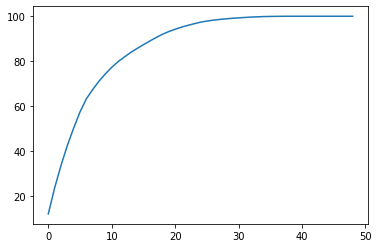

In [205]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=49)
pca.fit(X)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [206]:
pca = PCA(n_components=20)
pca.fit(X)
X1 = pca.fit_transform(X)

In [213]:
pca.fit(test)
test_X1 = pca.fit_transform(test)